In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [5]:
pd_data = pd.read_csv('cleanDataForApp.csv')

In [6]:
pd_data

,Season,Round,home_EOL,away_EOL,home_result
0,2021,1,65,60,1
1,2021,1,52,59,1
2,2021,1,41,48,-1
3,2021,1,63,57,1
4,2021,1,47,50,-1
...,...,...,...,...,...
26818,2021,25,55,48,0
26819,2021,25,58,59,0
26820,2021,25,60,39,-1
26821,2021,25,51,58,0


In [7]:
train_pd, test_pd, val_pd = pd_data[:20000], pd_data[20000:23317], pd_data[23317:]
len(train_pd), len(test_pd), len(val_pd)

(20000, 3317, 3506)

In [43]:
# Convert the datasets into to numpy to turn the data into matricies and vectors

X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((20000, 4), (20000,), (3506, 4), (3506,), (3317, 4), (3317,))

In [9]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[:, :4])

def preprocessor(X):
  A = np.copy(X)
  A[:, :4] = scaler.transform(A[:, :5])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

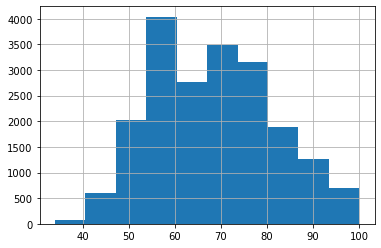

In [44]:
pd.DataFrame(X_train)[2].hist()

In [45]:
from sklearn import svm
from sklearn.metrics import accuracy_score
sv = svm.SVC(kernel='linear')
model=sv.fit(X_train, y_train)
Y_pred_svm = sv.predict(X_val)
score_svm = round(accuracy_score(Y_pred_svm,y_val)*100,2)
print("The accuracy score we have achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score we have achieved using Linear SVM is: 46.52 %


In [46]:
from joblib import dump, load

In [47]:
dump(model, 'model.joblib')

['model.joblib']

In [48]:
model_in = load('model.joblib')

In [53]:
model_in.predict(np.array([[2021,24,1,100],[2021,5,80,80],[2021,24,8,55],[2021,24,20,67]]))

array([-1,  1, -1, -1])